In [27]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [86]:
db = sqlite3.connect('../../datasets/checking-logs.sqlite')

In [87]:
d = pd.read_sql(""" SELECT * FROM checker""", db)
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402 entries, 0 to 3401
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      3402 non-null   int64 
 1   status     3402 non-null   object
 2   success    3402 non-null   int64 
 3   timestamp  3402 non-null   object
 4   numTrials  3402 non-null   int64 
 5   labname    3208 non-null   object
 6   uid        3217 non-null   object
dtypes: int64(3), object(4)
memory usage: 186.2+ KB


In [88]:
query = """SELECT timestamp, uid FROM checker WHERE status = 'ready' AND uid LIKE 'user_%' AND labname = 'project1'"""
df = pd.read_sql(query,db)
db.close()
df

,timestamp,uid
0,2020-04-17 05:19:02.744528,user_4
1,2020-04-17 05:22:45.549397,user_4
2,2020-04-17 05:34:24.422370,user_4
3,2020-04-17 05:43:27.773992,user_4
4,2020-04-17 05:46:32.275104,user_4
...,...,...
946,2020-05-15 10:22:39.698523,user_19
947,2020-05-15 10:22:46.248162,user_19
948,2020-05-15 10:23:18.043212,user_19
949,2020-05-15 10:38:14.430013,user_28


In [90]:
df['date'] = pd.to_datetime(df['timestamp']).dt.date
all_dates = df['date'].unique()
all_users = df['uid'].unique()
full_index = pd.MultiIndex.from_product([all_users, all_dates], names=['uid', 'date'])


In [91]:

user_commits = df.groupby(['date', 'uid']).size().reset_index(name='commits')
user_commits = (pd.DataFrame(index=full_index).join(user_commits.set_index(['uid', 'date'])).fillna(0).reset_index())
user_commits = user_commits.sort_values(['date', 'uid'])
user_commits['cumulative_commits'] = user_commits.groupby('uid')['commits'].cumsum()
user_commits

,uid,date,commits,cumulative_commits
494,user_1,2020-04-17,0.0,0.0
342,user_10,2020-04-17,0.0,0.0
76,user_11,2020-04-17,0.0,0.0
437,user_12,2020-04-17,0.0,0.0
285,user_13,2020-04-17,0.0,0.0
...,...,...,...,...
56,user_30,2020-05-15,0.0,19.0
151,user_31,2020-05-15,0.0,8.0
18,user_4,2020-05-15,0.0,164.0
398,user_6,2020-05-15,0.0,2.0


Text(0.5, 0.98, 'Dynamic of commits per user in project1')

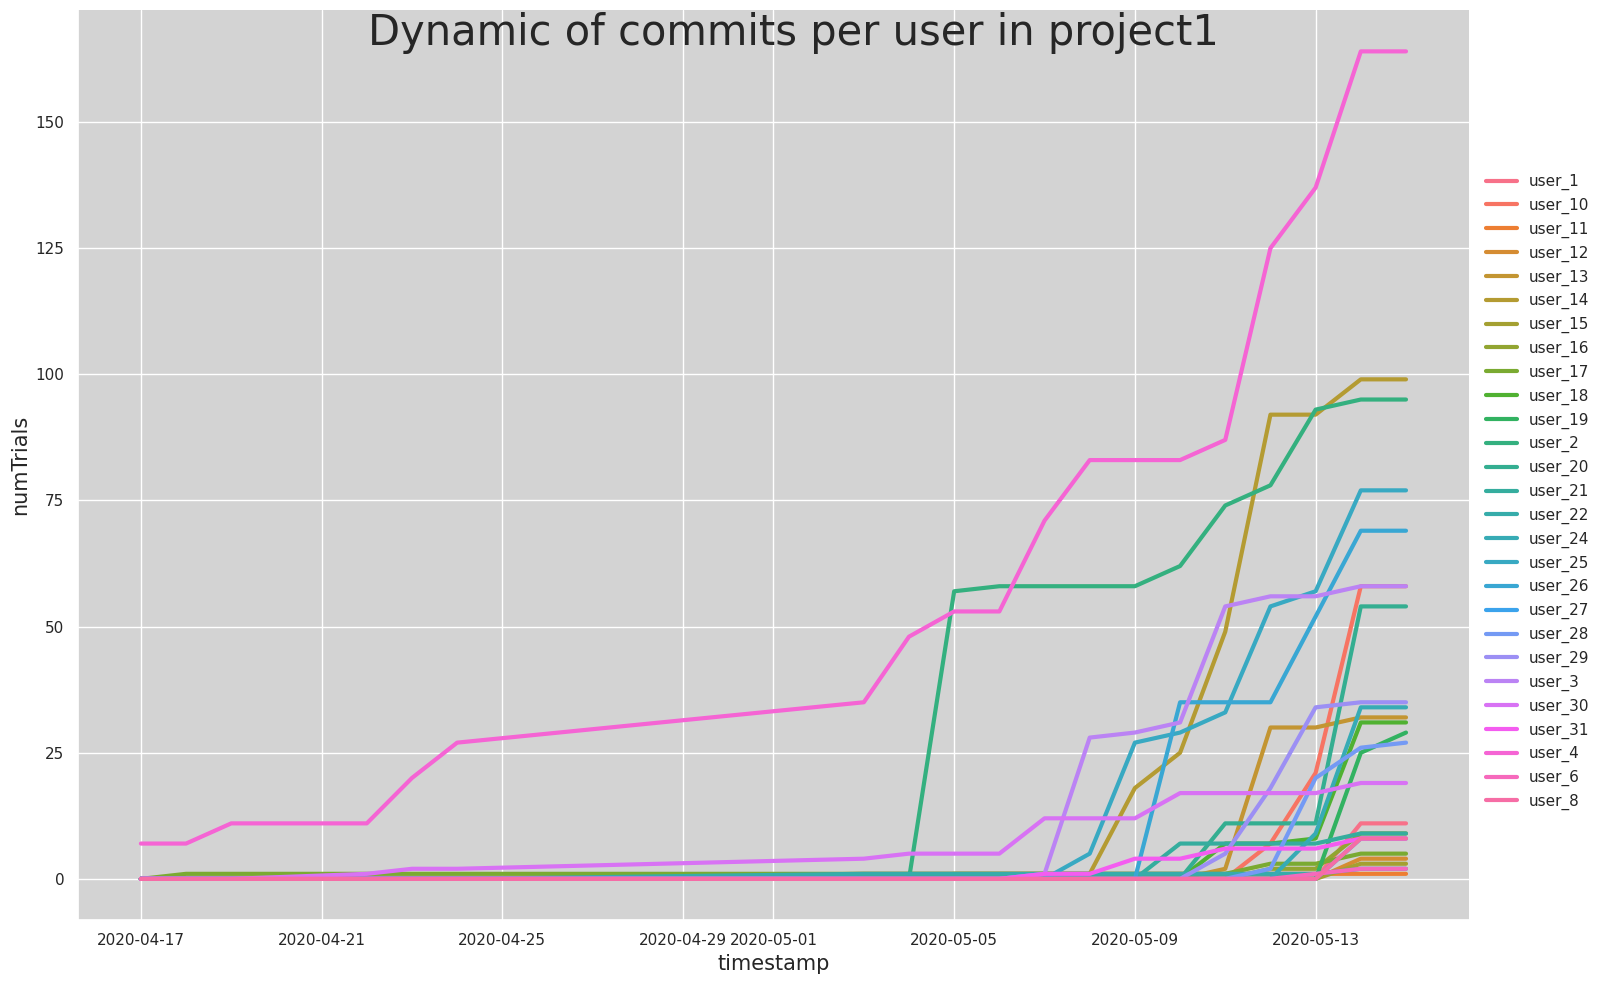

In [123]:
sns.set( 
        rc={'axes.facecolor': 'lightgrey',
            'grid.color': 'white',
            'axes.labelsize': 15,
            'lines.linewidth': 3})
g = sns.relplot(data=user_commits, x="date", y="cumulative_commits",
           legend = 'full', hue = 'uid', kind = 'line',
           height = 10, aspect = 1.5)
g.set(xlabel="timestamp", ylabel="numTrials")
g._legend.set_title('')
plt.suptitle('Dynamic of commits per user in project1', fontsize=30)

Which user was the leader in the number of commits almost all of the time?” The answer: user_*

user_4

Which user was the leader for only a short period of time?” The answer: user_

user_2